In [9]:
import pandas as pd
import re

# Path to your log file
log_file = 'grid_double_refined.log'

# Read the file
with open(log_file, 'r') as f:
    lines = f.readlines()

# Define column names based on header in log
columns = [
    "Iter", "dir", "h_norm", "Cost", "New_Cost", 
    "r_norm", "r_new_norm", "D_time", "E_time", "T_time", "Status"
]

# Prepare a list to hold parsed rows
data = []

for line in lines:
    # Skip empty or header lines
    if line.strip().startswith('#') or not line.strip():
        continue

    # Extract values using regex
    match = re.match(
        r"\s*(\d+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)"
        r"\s+D=([\d.]+)s E=([\d.]+)s T=([\d.]+)s\s+(\w+)", 
        line
    )
    if match:
        data.append([float(match.group(i)) if i != 11 else match.group(i) for i in range(1, 12)])

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Example usage
print(df.head())

   Iter       dir    h_norm      Cost     New_Cost     r_norm  r_new_norm  \
0   1.0 -0.991432  0.083130  3538.650  2974620.000  1618230.0  46747700.0   
1   2.0 -0.991431  0.041576  3538.650  1595550.000  1618230.0  44122200.0   
2   3.0 -0.991430  0.010396  3538.650   125954.000  1618230.0  17182400.0   
3   4.0 -0.991429  0.001300  3538.650      985.306  1618230.0    972136.0   
4   5.0 -0.649042  0.000725   985.306      225.943   972136.0    446808.0   

   D_time  E_time  T_time    Status  
0   0.250   2.413   2.664  REJECTED  
1   0.247   2.397   2.644  REJECTED  
2   0.246   2.401   2.648  REJECTED  
3   0.245   2.392   2.637  ACCEPTED  
4   0.246   2.391   2.637  ACCEPTED  


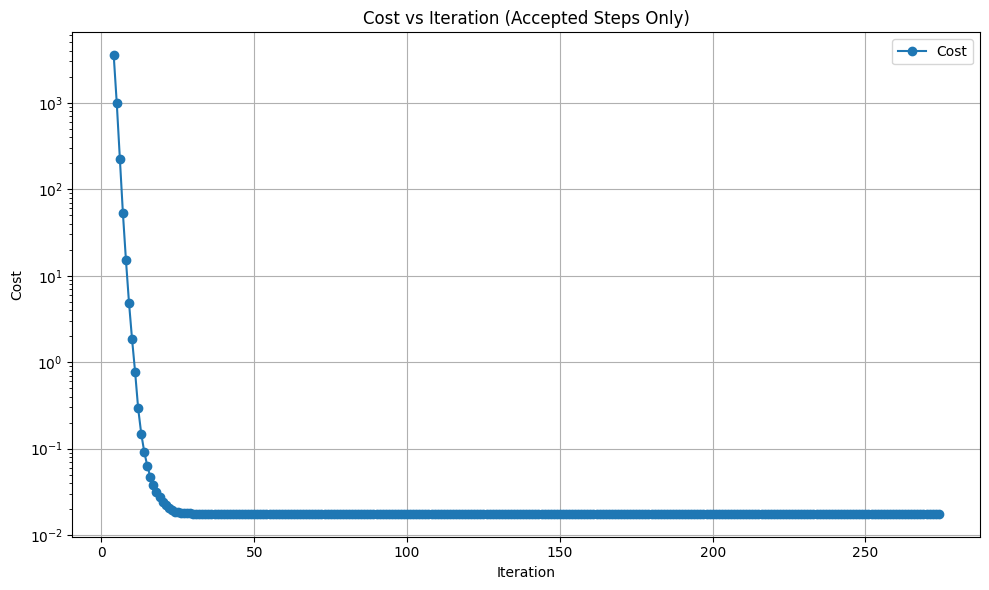

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Filter only accepted iterations
df_accepted = df[df['Status'] == 'ACCEPTED']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_accepted['Iter'], df_accepted['Cost'], label='Cost', marker='o')
# plt.plot(df_accepted['Iter'], df_accepted['New_Cost'], label='New Cost', marker='x')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration (Accepted Steps Only)')
plt.yscale('log')  # Optional: Use log scale if cost varies a lot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

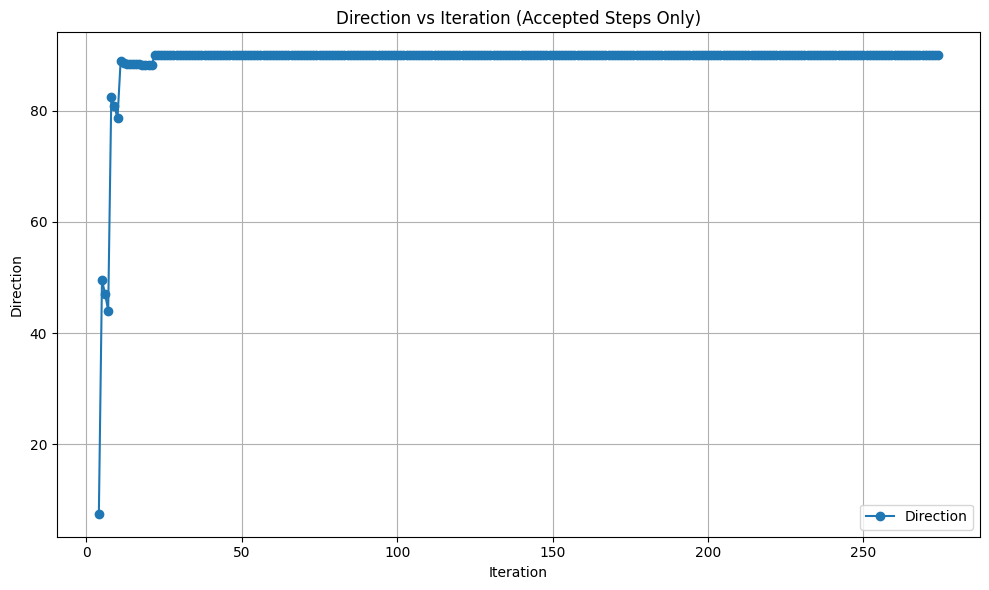

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
# Filter only accepted iterations
df_accepted = df[df['Status'] == 'ACCEPTED']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_accepted['Iter'], np.arccos(-df_accepted['dir'])/np.pi*180, label='Direction', marker='o')
# plt.plot(df_accepted['Iter'], df_accepted['New_Cost'], label='New Cost', marker='x')

plt.xlabel('Iteration')
plt.ylabel('Direction')
plt.title('Direction vs Iteration (Accepted Steps Only)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()